In [1]:
#Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

In [3]:
#Loading the dataset into a dataframe df
df = pd.read_csv(r"C:\Inemesit\antisocial-behaviour-analysis/MPS_Antisocial_Behaviour.csv")

C:\Users\R E F E M\AppData\Local\Temp\ipykernel_16832\3485550437.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Inemesit\antisocial-behaviour-analysis/MPS_Antisocial_Behaviour.csv")


In [4]:
#Accessing Infomation on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255432 entries, 0 to 255431
Data columns (total 27 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Date                                  255432 non-null  object 
 1   Hour                                  255432 non-null  object 
 2   OP01                                  255432 non-null  int64  
 3   Opening_Type_1                        255432 non-null  object 
 4   OP02                                  255016 non-null  object 
 5   Opening_Type_2                        251538 non-null  object 
 6   OP03                                  243850 non-null  object 
 7   Opening_Type_3                        112675 non-null  object 
 8   CL01                                  252785 non-null  object 
 9   Close_Type_1                          252366 non-null  object 
 10  CL02                                  235010 non-null  object 
 11  

In [5]:
# Fixing Columns 13 error pop-up
mixedCol = df.iloc[:, 13] 

# Checking unique data types in this column
print(mixedCol.map(type).value_counts())

Close_Type_3
<class 'float'>    255405
<class 'str'>          27
Name: count, dtype: int64


In [6]:
 # Random sample
print(mixedCol.sample(10)) 

17204     NaN
134697    NaN
164086    NaN
56905     NaN
69908     NaN
244460    NaN
44259     NaN
202420    NaN
14923     NaN
169954    NaN
Name: Close_Type_3, dtype: object


In [7]:
df["Close_Type_3"].unique()

array([nan, 'Violence Against The Person', 'Criminal Damage',
       'Drugs Offence', 'Unlisted Crime', 'Harassment Act Offences',
       'Civil Disputes', 'Road Related Offence', 'ASB Nuisance',
       'Protest / Demonstration', 'Licensing', 'Concern For Safety',
       'Animals - Pets / Domesticated', 'Thefts - Other ',
       'Theft - Shoplifting', 'RTC / Incident - Damage Only',
       'ASB Personal', 'Wanted - Police Crt Order/Bail'], dtype=object)

In [8]:
#Loading the dataset into a dataframe df
df = pd.read_csv(r"C:\Inemesit\antisocial-behaviour-analysis/MPS_Antisocial_Behaviour.csv", dtype={'Close_Type_3': str})

In [9]:
df.describe()

,OP01,Ward_Code,Response_Time,ASBCount,Datetime
count,255432.000000,0.0,2.554320e+05,255432.0,255432.0
mean,214.918370,NaN,6.512667e+03,1.0,20249.0
std,2.166979,NaN,4.909032e+04,0.0,0.0
min,11.000000,NaN,0.000000e+00,1.0,20249.0
25%,215.000000,NaN,0.000000e+00,1.0,20249.0
50%,215.000000,NaN,0.000000e+00,1.0,20249.0
75%,215.000000,NaN,5.980000e+02,1.0,20249.0
max,216.000000,NaN,1.521844e+06,1.0,20249.0


In [10]:
#Inspecting Datetime columns
df["Datetime"].unique()

array([20249], dtype=int64)

In [11]:
#Created a function for easy workflow 

def wrangle(filepath):
    
    #Loading the filepath on the function and setting col 13 as str.
    f1 = pd.read_csv(filepath,  dtype={'Close_Type_3': str})
    
     #Data Cleaning
    
     # Converting Date column to datetime
    f1['Date'] = pd.to_datetime(f1['Date'], errors='coerce')
    
     #Working with the Duplicates cols and renaming the NO and Yes with "0" and "1"
    f1['Duplicate']= f1['Duplicate'].replace({'Ye': 'Yes'}).replace({'Yes': 1, 'No': 0}).astype(int)
    
    #Dropping cols with excessive missing values
    f1.drop(columns=['Ward_Code'], inplace=True)
    f1.drop(columns=['Close_Type_3'], inplace=True)
    f1.drop(columns=['Datetime'], inplace=True)
    
    #Opening_Type_2 & 3,Close_Type_1 & 2, Resolutions_Type 1 &2 : Fill missing values with "Unknown" since they are categorical.
    f1['Opening_Type_2'].fillna("Unknown", inplace=True)
    f1['Opening_Type_3'].fillna("Unknown", inplace=True)
    f1['Close_Type_1'].fillna("Unknown", inplace=True)
    f1['Close_Type_2'].fillna("Unknown", inplace=True)
    f1['Ward'].fillna("Unknown", inplace=True)
    res_cols = ["Resolution_Type_1","Resolution_Type_2"]
    f1[res_cols] = f1[res_cols].fillna("Unknown")
    
    #Using median() to fill missing values in response_Time cols, OP02, & OP03
    f1['Response_Time'].fillna(f1['Response_Time'].median(), inplace = True)
    
    # Converting to numeric (coerce errors to NaN) for OP02 & OP03
    f1["OP02"] = pd.to_numeric(f1["OP02"], errors="coerce")
    f1["OP03"] = pd.to_numeric(f1["OP03"], errors="coerce")

    # Filling NaN with the median and converting it into integer
    f1["OP02"] = f1["OP02"].fillna(f1["OP02"].median()).astype(int)
    f1["OP03"] = f1["OP03"].fillna(f1["OP03"].median()).astype(int)
    
    #Dropping duplicates across the entire data sunce the ASB data should be unique
    f1.drop_duplicates(inplace=True)
    
    #Standizing Data
    f1['Opening_Type_1'] = f1['Opening_Type_1'].str.strip().str.title()
    f1['Opening_Type_2'] = f1['Opening_Type_2'].str.strip().str.title()
    f1['Opening_Type_3'] = f1['Opening_Type_3'].str.strip().str.title()
    f1['Close_Type_1'] = f1['Close_Type_1'].str.strip().str.title()
    f1['Close_Type_2'] = f1['Close_Type_2'].str.strip().str.title()
    f1['Resolution_Type_1'] = f1['Resolution_Type_1'].str.strip().str.title()
    f1['Ward'] = f1['Ward'].str.strip().str.title()
    f1['Safer_Neighborhood_Team_Name'] = f1['Safer_Neighborhood_Team_Name'].str.strip().str.title()
    f1['Safer_Neighborhood_Team_Borough_Name'] = f1['Safer_Neighborhood_Team_Borough_Name'].str.strip().str.title()
    
    # Converting categorical columns to 'category' type
    cat_cols = [
    'Opening_Type_1', 'Opening_Type_2', 'Opening_Type_3',
    'Close_Type_1', 'Close_Type_2','Resolution_Type_1', 'Resolution_Type_2', 'Ward',
    'Safer_Neighborhood_Team_Name', 'Safer_Neighborhood_Team_Borough_Name']
    f1[cat_cols] = f1[cat_cols].astype('category')
    
    # Converting Hour string to a timedelta (duration from midnight)
    f1['Hour_Timedelta'] = pd.to_timedelta(f1['Hour'] + ':00')  # adding seconds to match HH:MM:SS

    # Combining HourTime with the Date
    f1['DateTime'] = f1['Date'] + f1['Hour_Timedelta']
    
    f1['DayOfWeek'] = f1['DateTime'].dt.day_name()
    f1['Month'] = f1['DateTime'].dt.month_name()
    f1['HourOnly'] = f1['DateTime'].dt.hour
    
    return f1

In [12]:
f1 = wrangle(r"C:\Inemesit\antisocial-behaviour-analysis/MPS_Antisocial_Behaviour.csv")
print("f1 shape:", f1.shape)
f1.head()

f1 shape: (254226, 29)


,Date,Hour,OP01,Opening_Type_1,OP02,Opening_Type_2,OP03,Opening_Type_3,CL01,Close_Type_1,...,Ward_WardCode,Safer_Neighborhood_Team_Name,Safer_Neighborhood_Team_Code,Safer_Neighborhood_Team_Borough_Name,Safer_Neighborhood_Team_Borough_Code,Hour_Timedelta,DateTime,DayOfWeek,Month,HourOnly
0,2024-04-07,19:00,215,Asb Nuisance,202,Rowdy Or Inconsiderate Behaviour,601,Unknown,215,Asb Nuisance,...,E05013528,North Greenford,E05013528,Ealing,XB,0 days 19:00:00,2024-04-07 19:00:00,Sunday,April,19
1,2024-04-01,20:00,215,Asb Nuisance,601,Drug Related,601,Unknown,215,Asb Nuisance,...,E05011116,South Bermondsey,E05011116,Southwark,MD,0 days 20:00:00,2024-04-01 20:00:00,Monday,April,20
2,2024-04-14,16:00,215,Asb Nuisance,202,Rowdy Or Inconsiderate Behaviour,601,Drug Related,215,Asb Nuisance,...,E05013752,White City,E05013752,Hammersmith And Fulham,FH,0 days 16:00:00,2024-04-14 16:00:00,Sunday,April,16
3,2024-04-04,18:00,215,Asb Nuisance,202,Rowdy Or Inconsiderate Behaviour,601,Unknown,215,Asb Nuisance,...,E05009378,Hoxton West,E05009378,Hackney,GD,0 days 18:00:00,2024-04-04 18:00:00,Thursday,April,18
4,2024-04-02,18:00,215,Asb Nuisance,204,Rowdy / Nuisance Neighbours,211,Noise,215,Asb Nuisance,...,E05013623,Hounslow South,E05013623,Hounslow,TX,0 days 18:00:00,2024-04-02 18:00:00,Tuesday,April,18


In [12]:
f1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 254226 entries, 0 to 255431
Data columns (total 29 columns):
 #   Column                                Non-Null Count   Dtype          
---  ------                                --------------   -----          
 0   Date                                  254226 non-null  datetime64[ns] 
 1   Hour                                  254226 non-null  object         
 2   OP01                                  254226 non-null  int64          
 3   Opening_Type_1                        254226 non-null  category       
 4   OP02                                  254226 non-null  int32          
 5   Opening_Type_2                        254226 non-null  category       
 6   OP03                                  254226 non-null  int32          
 7   Opening_Type_3                        254226 non-null  category       
 8   CL01                                  251638 non-null  object         
 9   Close_Type_1                          254226 non-null

In [13]:
f1.describe()

,Date,OP01,OP02,OP03,Response_Time,Duplicate,ASBCount,Hour_Timedelta,DateTime,HourOnly
count,254226,254226.000000,254226.000000,254226.000000,2.542260e+05,254226.000000,254226.0,254226,254226,254226.000000
mean,2024-03-06 23:20:24.752779520,214.918749,221.921582,548.947822,6.542883e+03,0.081317,1.0,0 days 13:47:34.697788581,2024-03-07 13:07:59.450567168,13.792972
min,2023-09-01 00:00:00,11.000000,1.000000,1.000000,0.000000e+00,0.000000,1.0,0 days 00:00:00,2023-09-01 00:00:00,0.000000
25%,2023-11-29 00:00:00,215.000000,202.000000,601.000000,0.000000e+00,0.000000,1.0,0 days 10:00:00,2023-11-29 03:00:00,10.000000
50%,2024-03-14 00:00:00,215.000000,202.000000,601.000000,0.000000e+00,0.000000,1.0,0 days 15:00:00,2024-03-14 20:00:00,15.000000
75%,2024-06-12 00:00:00,215.000000,204.000000,601.000000,6.090000e+02,0.000000,1.0,0 days 19:00:00,2024-06-12 11:00:00,19.000000
max,2024-08-31 00:00:00,216.000000,723.000000,723.000000,1.521844e+06,1.000000,1.0,0 days 23:00:00,2024-08-31 23:00:00,23.000000
std,NaN,2.134083,88.442032,144.118440,4.920347e+04,0.273322,0.0,0 days 06:33:11.338381484,NaN,6.553150


In [7]:
# Defining a function to classify ASB incidents based on the type of openings

def classifyASB(row):
     # Defining a set of keywords associated with 'Personal' ASB incidents
    personal = set([
        'vehicle abandoned (not stolen)', 
        'vehicle nuisance/inappropriate use', 
        'rowdy or inconsiderate behaviour', 
        'rowdy/nuisance neighbours'
    ])
    # Defining a set of keywords associated with 'Nuisance' ASB incidents
    nuisance = set([
        'littering/drug paraphernalia', 
        'animal problems', 
        'trespass', 
        'malicious/nuisance communications'
    ])
    
     # Defining a set of keywords associated with 'Environment' ASB incidents
    environmental = set([
        'street drinking', 
        'prostitution-related activity', 
        'noise', 
        'begging / vagrancy', 
        'fireworks'
    ])
    
      # Iterating through the opening type columns 
    for col in ['Opening_Type_1', 'Opening_Type_2', 'Opening_Type_3']:
        val = row[col]
        
        # Skipping null cell
        if pd.isnull(val):
            continue
            
        # Standardizing the value (stripping whitespace and converting to lowercase)
        val = str(val).strip().lower()
        
        # Checking if the value falls into any of the predefined ASB categories
        if val in personal:
            return 'Personal'
        elif val in nuisance:
            return 'Nuisance'
        elif val in environmental:
            return 'Environmental'
    return 'Others'

# Apply the function row-wise to classify each record and create a new column 'ASBQualifier'
f1['ASBQualifier'] = f1.apply(classifyASB, axis=1)

       Qualifier   Count  Percentage
0       Personal  146084       57.46
1         Others   69573       27.37
2  Environmental   28392       11.17
3       Nuisance   10177        4.00


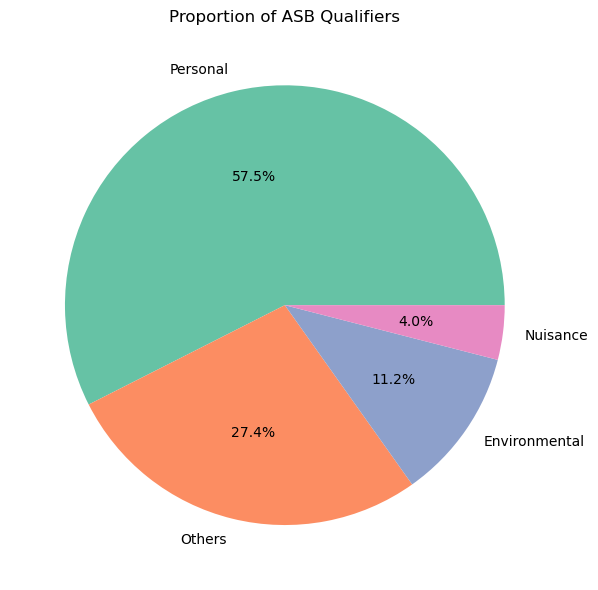

In [8]:
# Counting ASBQualifier proportions

Countqualifier = f1['ASBQualifier'].value_counts(dropna=False)
Qualifierpercent = round((Countqualifier / Countqualifier.sum()) * 100, 2)

# Combining into a DataFrame 
qualifierdf = pd.DataFrame({
    'Qualifier': Countqualifier.index,
    'Count': Countqualifier.values,
    'Percentage': Qualifierpercent.values
})

# Print the summary
print(qualifierdf)

# Plot as a pie chart
plt.figure(figsize=(8, 6))
plt.pie(qualifierdf['Count'], labels=qualifierdf['Qualifier'], autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'])
plt.title("Proportion of ASB Qualifiers")
plt.tight_layout()
plt.show()

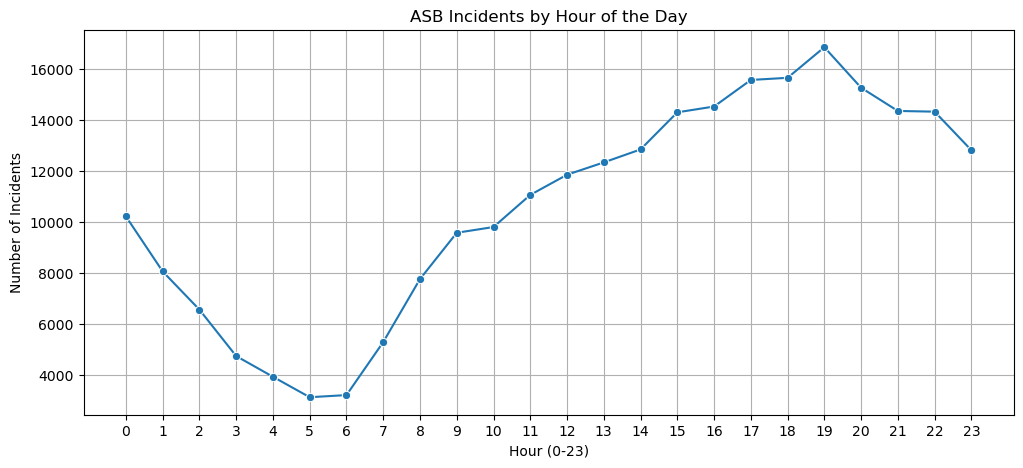

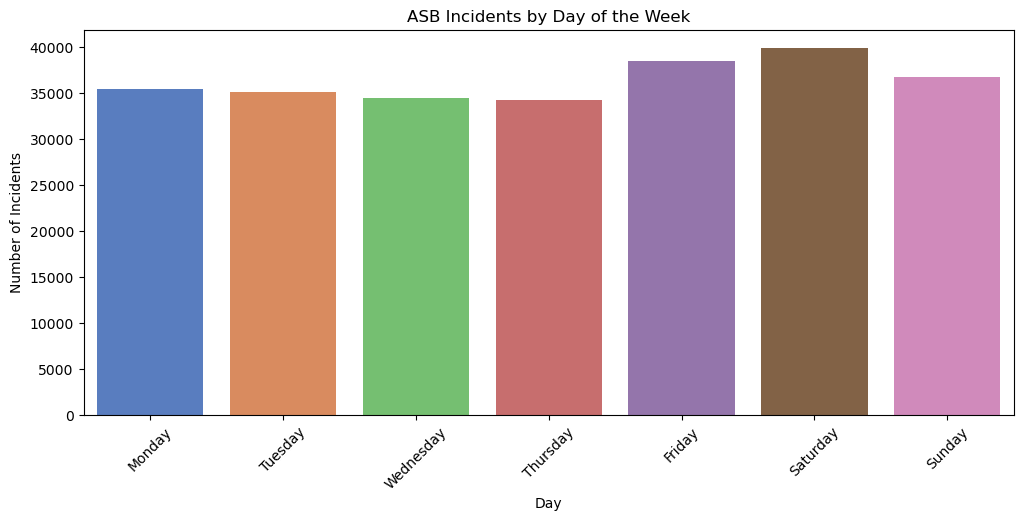

In [20]:
# --- ASB Incidents by Hour of the Day ---

# Count the number of ASB incidents for each hour (0–23), and sort by hour
hourlyCounts = f1['HourOnly'].value_counts().sort_index()

# Created a line plot to visualize incident frequency across hours
plt.figure(figsize=(12, 5))  # Setting figure size
sns.lineplot(x=hourlyCounts.index.astype(int),  # Converting index to int for proper plotting
             y=hourlyCounts.values, 
             marker='o')  # Marking each data point with a dot

# Customizing the plot
plt.title('ASB Incidents by Hour of the Day')  # Setting title
plt.xlabel('Hour (0-23)')  # X-axis label
plt.ylabel('Number of Incidents')  # Y-axis label
plt.grid(True)  # Showing gridlines
plt.xticks(range(0, 24))  # Setting x-ticks for all 24 hours
plt.show()  # Displaying the plot


# --- ASB Incidents by Day of the Week ---

# Created a bar chart showing ASB incidents grouped by day of the week
plt.figure(figsize=(12, 5))  # Set figure size

# Defining the order of days to maintain logical sequence
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting the number of incidents per day using Seaborn's countplot
sns.countplot(x='DayOfWeek', data=f1, order=order, palette='muted')

# Customizing the plot
plt.title('ASB Incidents by Day of the Week')  # Set title
plt.xlabel('Day')  # X-axis label
plt.ylabel('Number of Incidents')  # Y-axis label
plt.xticks(rotation=45)  # Rotating x-axis labels for readability
plt.show()  # Displaying the plot

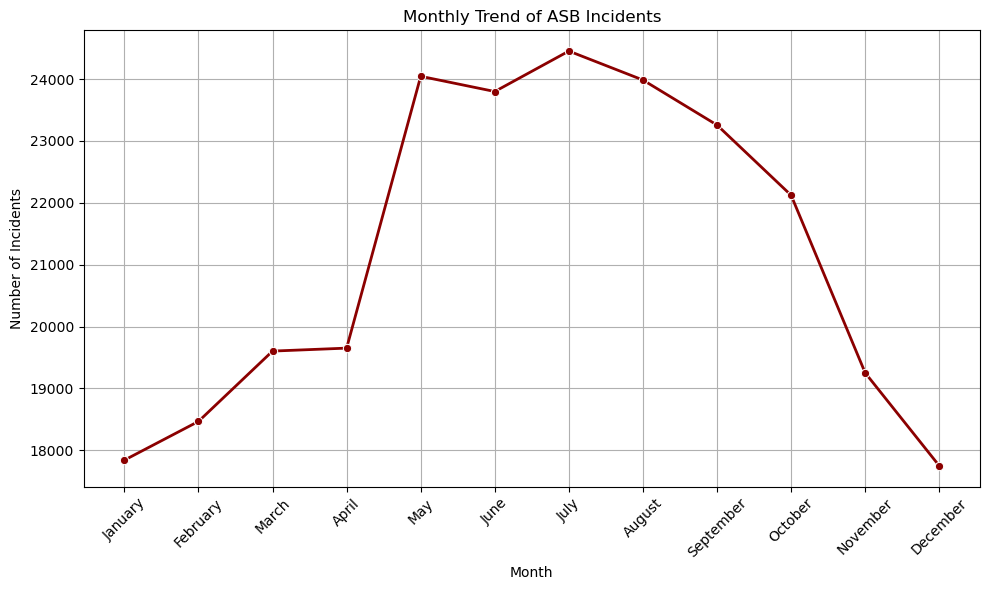

In [22]:
# --- Grouping ASB Incidents by Month (January to December) ---

# Counting the number of ASB incidents for each month

# Reindexing the result to ensure that the months are in calendar order
monthlyCounts = f1['Month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# --- Plotting Monthly Trends of ASB Incidents ---

plt.figure(figsize=(10, 6))  # Setting the size of the plot

# Creating a line plot showing the number of ASB incidents per month
sns.lineplot(
    x=monthlyCounts.index,         # X-axis: months
    y=monthlyCounts.values,        # Y-axis: number of incidents
    marker='o',                    # Use circle markers on data points
    linewidth=2,                   # Set the line width
    color='darkred'                # Set the line color
)

# Customizing the plot
plt.title('Monthly Trend of ASB Incidents')  # Setting the title of the plot
plt.xlabel('Month')                          # X-axis label
plt.ylabel('Number of Incidents')            # Y-axis label
plt.xticks(rotation=45)                      # Rotating month labels for better readability
plt.grid(True)                               # Adding gridlines for easier interpretation
plt.tight_layout()                           # Adjusting layout to prevent overlap
plt.show()                                   # Displaying the plot

# Count ASB incidents per borough and select the top 5

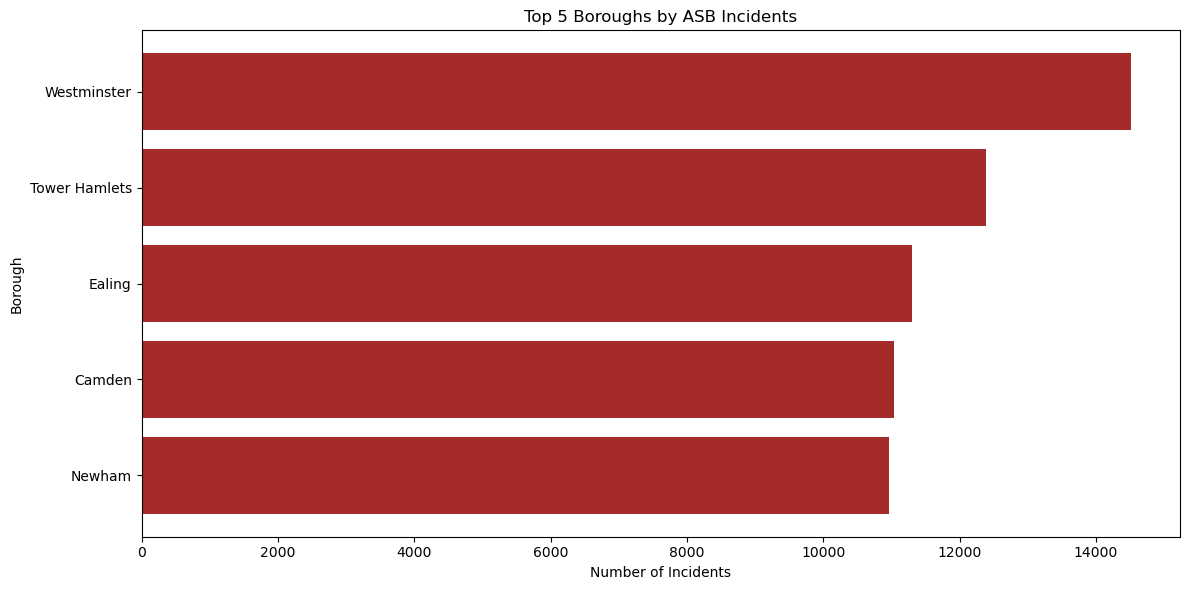

In [23]:


# Counting the number of ASB incidents grouped by borough
# Using .head(5) to select the top 5 boroughs with the highest incident counts

topboro = f1['Safer_Neighborhood_Team_Borough_Name'].value_counts().head(5)

# --- Plotting the Top 5 Boroughs Using Matplotlib ---

plt.figure(figsize=(12, 6))  # Setting the size of the plot

# Creating a horizontal bar chart
# Reversing the index and values so that the borough with the highest count appears on top
plt.barh(topboro.index[::-1], topboro.values[::-1], color='brown')

# Setting plot title and axis labels
plt.title('Top 5 Boroughs by ASB Incidents')  # Chart title
plt.xlabel('Number of Incidents')             # X-axis label
plt.ylabel('Borough')                         # Y-axis label

plt.tight_layout()  # Adjusting the layout to ensure labels fit well
plt.show()          # Displaying the plot


# Count ASB incidents per borough and select the bottom 5 

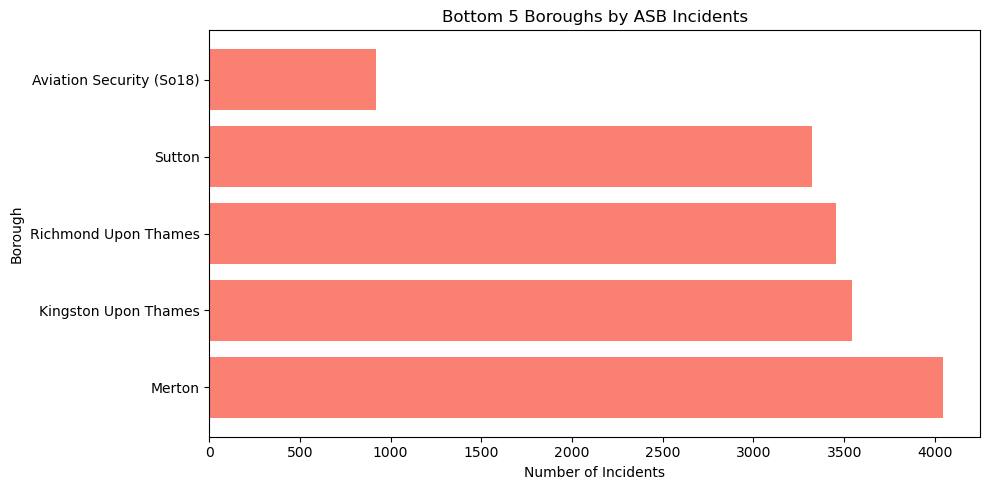

In [24]:


# Counting the number of ASB incidents per borough
# Using .tail(5) to get the 5 boroughs with the lowest number of incidents
bottomboro = f1['Safer_Neighborhood_Team_Borough_Name'].value_counts().tail(5)

# --- Plotting the Bottom 5 Boroughs Using Matplotlib ---

plt.figure(figsize=(10, 5))  # Setting the figure size

# Creating a horizontal bar chart for the bottom 5 boroughs
plt.barh(bottomboro.index, bottomboro.values, color='salmon')  # 'salmon' color for visual distinction

# Adding chart title and axis labels
plt.title('Bottom 5 Boroughs by ASB Incidents')  # Titling chart
plt.xlabel('Number of Incidents')                # Labeling x-axis
plt.ylabel('Borough')                            # Labeling y-axis

plt.tight_layout()  # Ensuring labels and titles fit neatly
plt.show()          # Displaying the plot

# Top 4 Most Frequent Opening Types


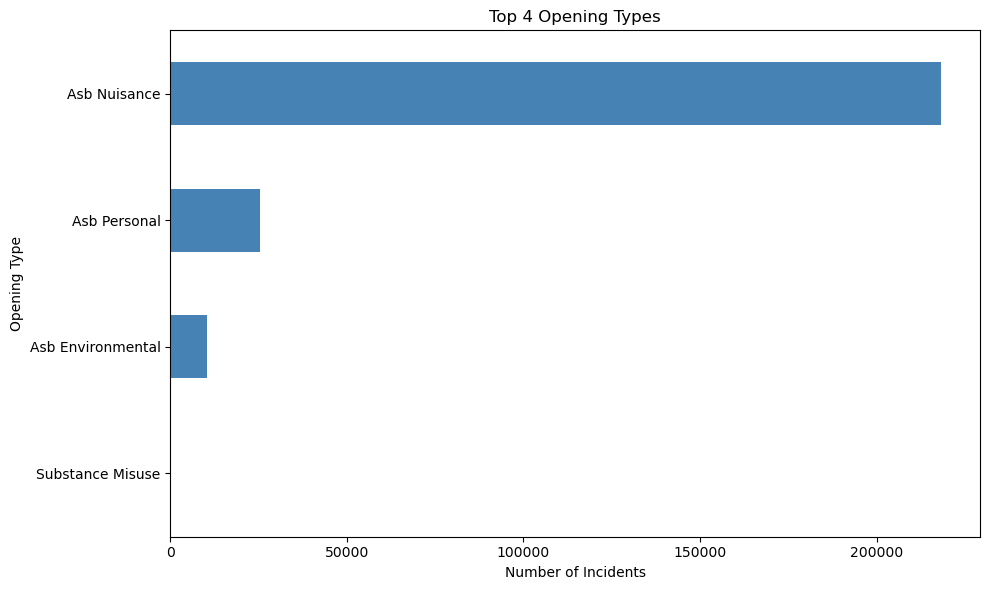

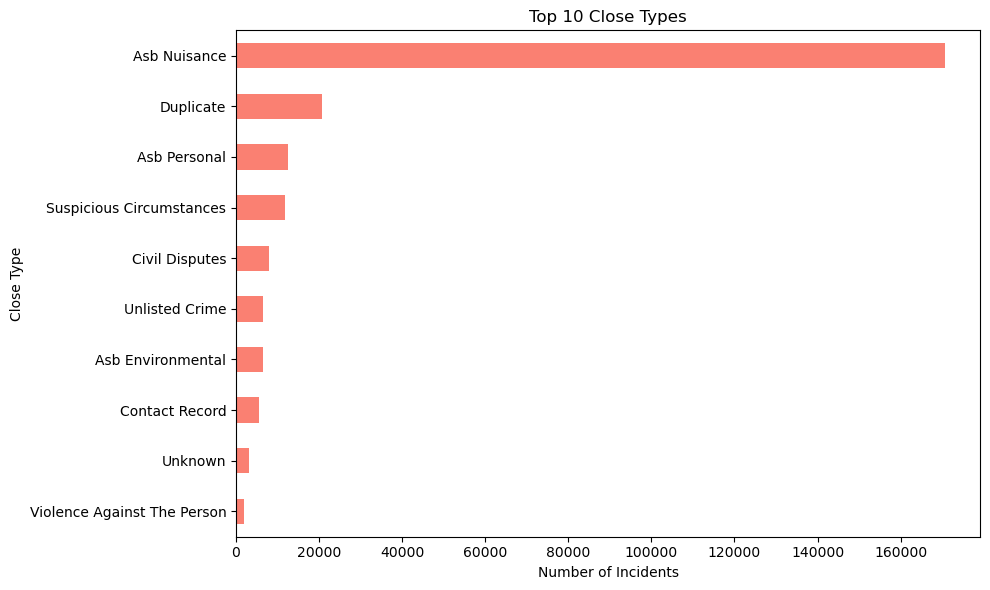

In [25]:
# Counting the frequency of each value in the 'Opening_Type_1' column & Selecting top 4 most common opening types

topOpening = f1['Opening_Type_1'].value_counts().head(4)

# Creating a horizontal bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
topOpening.plot(
    kind='barh',              # Horizontal bar plot
    color='steelblue',        # Bar color
    title='Top 4 Opening Types'  # Title of the plot
)
# Adding axis labels
plt.xlabel('Number of Incidents')
plt.ylabel('Opening Type')

# Inverting the y-axis to show the most frequent at the top
plt.gca().invert_yaxis()
plt.tight_layout()  # Adjusting layout to prevent clipping
plt.show()          # Displaying the plot
# Top 10 Most Frequent Close Types 
# Counting the frequency of each value in the 'Close_Type_1' column
# Selecting top 10 most common close types
topClose = f1['Close_Type_1'].value_counts().head(10)
# Closing a horizontal bar chart
plt.figure(figsize=(10, 6))  # Setting the figure size
topClose.plot(
    kind='barh',             # Horizontal bar plot
    color='salmon',          # Bar color
    title='Top 10 Close Types'  # Titling plot
)
# Adding axis labels
plt.xlabel('Number of Incidents')
plt.ylabel('Close Type')
# Inverting the y-axis to show the most frequent at the top
plt.gca().invert_yaxis()
plt.tight_layout()  # Adjusting layout to prevent clipping
plt.show()          # Displaying plot

# Grouping data to get total ASB incidents and average response time per borough

In [10]:
#

C:\Users\R E F E M\AppData\Local\Temp\ipykernel_7356\3162513757.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(grouped.index, rotation=90)  # Rotate borough labels for readability


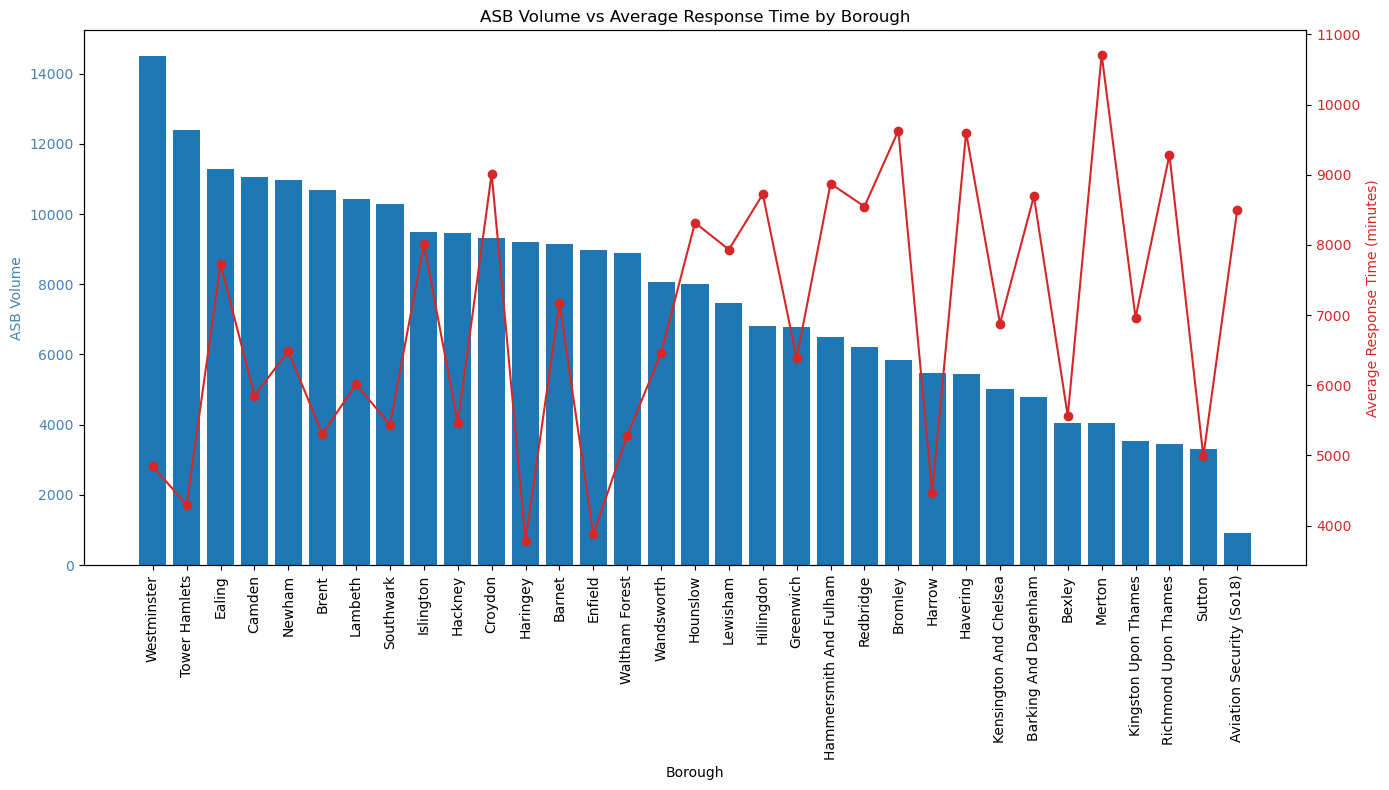

In [26]:

# Grouping data by borough and calculate:
# - Total ASB incidents using the 'ASBCount' column
# - Average response time using the 'Response_Time' column
# Sorting the results in descending order by ASB incident count
grouped = f1.groupby('Safer_Neighborhood_Team_Borough_Name').agg({
    'ASBCount': 'sum',
    'Response_Time': 'mean'
}).sort_values(by='ASBCount', ascending=False)

# Creating a figure and axis object for plotting
fig, ax1 = plt.subplots(figsize=(14, 8))  # Set figure size

# Bar Plot for ASB Volume

color = 'tab:blue'
ax1.set_xlabel('Borough')  # X-axis label
ax1.set_ylabel('ASB Volume', color="steelblue")  # Left Y-axis label
ax1.bar(grouped.index, grouped['ASBCount'], color=color, label='ASB Volume')  # Bar plot for ASB count
ax1.tick_params(axis='y', labelcolor="steelblue")  # Seting Y-axis tick color to match bar color
ax1.set_xticklabels(grouped.index, rotation=90)  # Rotating borough labels for readability

# Line Plot for Average Response Time

# Creating a secondary Y-axis that shares the same X-axis
ax2 = ax1.twinx()  

color = 'tab:red'
ax2.set_ylabel('Average Response Time (minutes)', color=color)  # Right Y-axis label
ax2.plot(grouped.index, grouped['Response_Time'], color=color, marker='o', label='Avg Response Time')  # Line plot for response time
ax2.tick_params(axis='y', labelcolor=color)  # Setting Y-axis tick color to match line color

# Seting plot title and layout
plt.title('ASB Volume vs Average Response Time by Borough')
plt.tight_layout()  # Adjusting layout to avoid label overlap
plt.show()  # Displaying plot

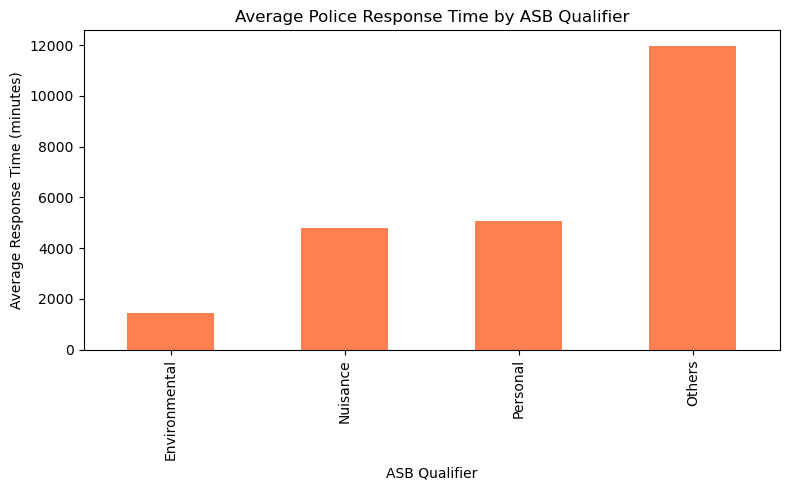

In [27]:
# Grouping the data by ASBQualifier and calculate the mean response time for each category
resbyQualifier = f1.groupby('ASBQualifier')['Response_Time'].mean().sort_values()

# Plotting the average response time by ASB qualifier as a bar chart
resbyQualifier.plot(kind='bar', figsize=(8,5), color='coral')

# Adding a title and axis labels to the chart
plt.title('Average Police Response Time by ASB Qualifier')
plt.xlabel('ASB Qualifier')
plt.ylabel('Average Response Time (minutes)')

# Improving layout to avoid overlapping elements
plt.tight_layout()

# Displaying plot
plt.show()

In [ ]:
"""Hypothesis Formulation
Null Hypothesis (H₀): There is no significant difference in the average police response time across the 
                    three ASB qualifiers (Personal, Nuisance, Environmental, Others).
                    
Alternative Hypothesis (H₁): At least one ASB qualifier has a significantly different average police response time."""

In [9]:
# Grouping response times by ASB qualifier
personal = f1[f1['ASBQualifier'] == 'Personal']['Response_Time']
nuisance = f1[f1['ASBQualifier'] == 'Nuisance']['Response_Time']
environmental = f1[f1['ASBQualifier'] == 'Environmental']['Response_Time']
others = f1[f1['ASBQualifier'] == 'Others']['Response_Time']

# Performing ANOVA
f_stat1, p_value1 = f_oneway(personal, nuisance, environmental, others)

print("F-statistic:", f_stat1)
print("P-value:", p_value1)

F-statistic: 435.42059150036926
P-value: 3.42205486753084e-282
